<h1> Table of Contents</h1>

<h2>1. Importing Libraries and dependencies</h2>
<p>pandas, numpy, matplotlib, seaborn, nltk, sklearn</p>
<h2>2. Text Data Preparation</h2>
<p>Text extraction, Tokenization, Stop-words and punctuatiion removal</p>
<h2>3. Transforming Text Data</h2>
<p><ol><li>Bag of Words,<li> Tf-Idf </ol></p>
<h2>4. Model Building and Classifcation</h2>
<p><ol><li>bag of words, <li>tf-idf vector space <li>without stop words <li>with less words per document</ol></p>
<h2>5. Model Evaluation</h2>
<p>Confusion matrix, classification report, champion model</p>
<h2>Error Analysis with champion Model</h2>

# 1. Importing Libraries and Dependience

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np
import regex as re
import random
import string
import glob

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn_image as isns
from wordcloud import WordCloud, STOPWORDS

# Feature Engineering
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import remove_stopwords
from gensim import corpora

# Data Splitting
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# Model Building 
from sklearn.pipeline import Pipeline

# Models
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Evaluation Metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score as asc
from sklearn.metrics import classification_report

# 2. Text Data Preparation

In [2]:
textFiles = glob.glob('Books/*.txt')

BookLabels = {}
for index, book in enumerate(textFiles):
    BookLabels[chr(65 + index)] = re.split(r"Books\\", book)[-1]
    
BookLabels

{'A': 'Adventures of Sherlock Holmes.txt',
 'B': 'Arsene Lupin.txt',
 'C': 'The Last Stroke.txt',
 'D': 'The Mysterious Affairs at Styles.txt',
 'E': 'The Red House Mystery.txt'}

In [3]:
def Txt2List(filename, partitions,wordinRec):
    np.random.seed(42)
    # Randomly selection
    f = open(filename, 'r',  encoding="utf8")
    content = f.read().replace('\n', ' ')
    f.close
    
    # Select only the words from the file
    word_ls = re.split(r'\W+', content)
    
    partitions = 200
    wordinRec = 100
    recs = []
    
    for i in range(int(len(word_ls)/wordinRec)):
        recs.append(' '.join(word_ls[i*wordinRec : i*wordinRec + wordinRec]))
    np.random.seed(42)    
    # return 200 random samples from the recs list excluding the index page 
    return random.sample(recs[10:], partitions)

In [4]:
np.random.seed(42)
files = glob.glob('books/*.txt')
df = pd.DataFrame(columns=['text','label'])
Label = 65
BookLabels = {}
for book in files:
    tdf = pd.DataFrame()
    tdf['text'] = Txt2List(book,200,100)
    tdf['label'] = chr(Label)
    df = df.append(tdf, ignore_index=True)
    
    BookLabels[re.split(r"books\\", book)[-1]] = chr(Label)
    Label += 1

In [5]:
df_unclean = df.copy()
df_unclean.to_csv('unfilteredRecords.csv', index=False)
df.head()

,text,label
0,rose at once Jephro said she there is an imper...,A
1,wore some dark coat such as he had started to ...,A
2,from Dundee If they had come from Pondicherry ...,A
3,As she swept silently into the room she impres...,A
4,injury It must have bled considerably Yes it d...,A


In [6]:
def textfilter(text):
    nopuncText = removePunctuations(text)
    filteredWords = [word for word in nltk.word_tokenize(nopuncText) if not word in stopwords.words()]
    return re.sub(r"\b\d+\b","",(" ".join(filteredWords)))
def removePunctuations(text):
    return re.sub(r'[^\w\s]','',text.lower())

In [7]:
%%time
print('##############Before removing stop Words\n'+df.text[0])

df.text = df['text'].apply(textfilter)

print('\n##############After removing stop words\n'+df.text[0])

##############Before removing stop Words
rose at once Jephro said she there is an impertinent fellow upon the road there who stares up at Miss Hunter No friend of yours Miss Hunter he asked No I know no one in these parts Dear me How very impertinent Kindly turn round and motion to him to go away Surely it would be better to take no notice No no we should have him loitering here always Kindly turn round and wave him away like that I did as I was told and at the same instant Mrs Rucastle drew down the blind That was a week

##############After removing stop words
rose jephro said impertinent fellow upon road stares miss hunter friend miss hunter asked know parts dear impertinent kindly turn round motion go away surely would better notice loitering always kindly turn round wave away like told instant mrs rucastle drew blind week
Wall time: 8min 4s


In [8]:
df.to_csv('filteredRecords2.csv', index=False)

<AxesSubplot:ylabel='count'>

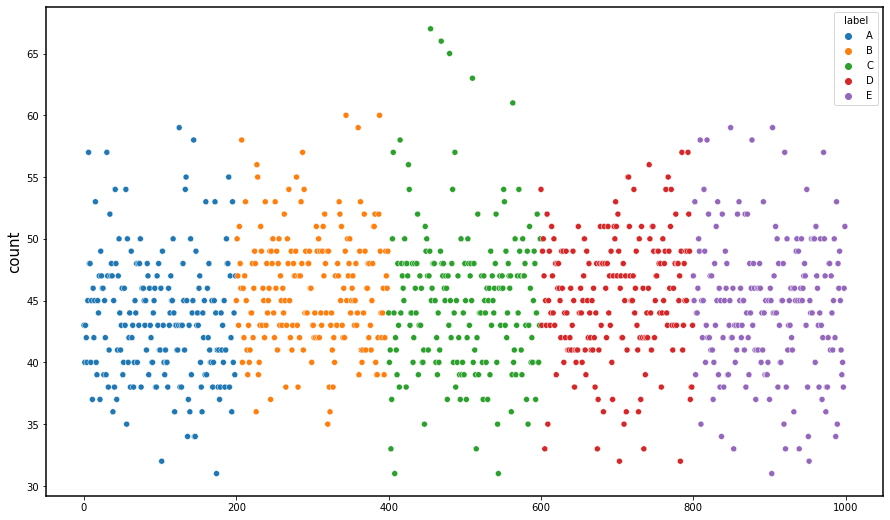

In [9]:
def countWords(text):
    return len(nltk.word_tokenize(text))

df['count'] = df['text'].apply(countWords)

plt.figure(figsize=(15,9))
sns.scatterplot(x =df.index, y = 'count', hue = 'label', data = df)


In [10]:
df = pd.read_csv('filteredRecords2.csv')
df.head()

,text,label
0,rose jephro said impertinent fellow upon road ...,A
1,wore dark coat started town neither collar nec...,A
2,dundee pondicherry steamer would arrived almos...,A
3,swept silently room impressed greater sense gr...,A
4,injury must bled considerably yes fainted done...,A


#### Add a WordCloud [Later]

# 3. Transforming Text Data

## 3.1 Bag of Words

In [11]:
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(df.text).toarray()
X_bow.shape

(1000, 7926)

In [12]:
BOW_df = pd.DataFrame(X_bow,columns = vectorizer.get_feature_names())
BOW_df.head()

,15th,16th,1_s_,27th,29th,2_s_,2nd,3rd,3vi,3viii,...,yielded,yonder,yorkshire,young,younger,youth,youthful,zeal,zero,zip
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


[Text(0.5, 1.0, 'CountVectorzer')]

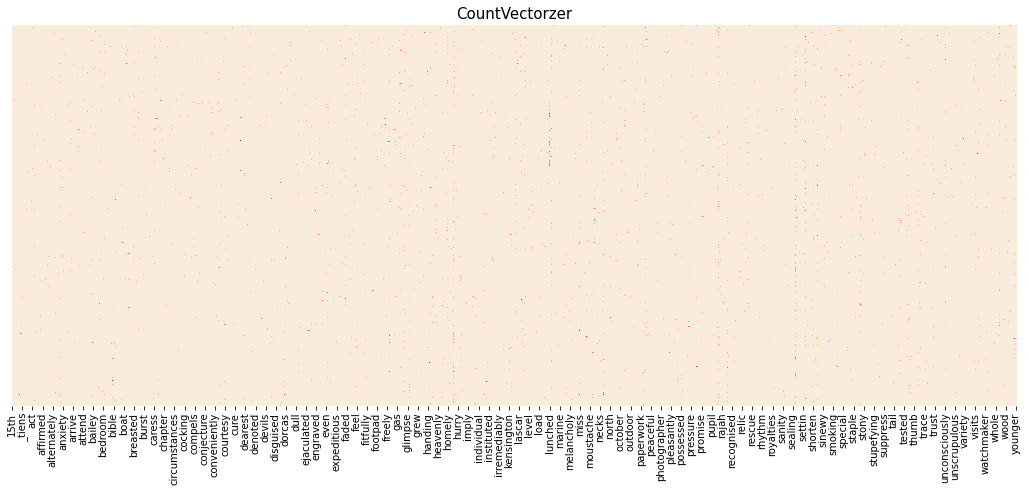

In [13]:
plt.figure(figsize=(18,7))
sns.heatmap(BOW_df, cbar =False,yticklabels = False, cmap = 'rocket_r').set(title='CountVectorzer')

## 3.2 TF-IDF

In [14]:
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_bow).toarray()
X_tfidf.shape

(1000, 7926)

In [15]:
TFIDF_df = pd.DataFrame(X_tfidf, columns = vectorizer.get_feature_names())
TFIDF_df.head()

,15th,16th,1_s_,27th,29th,2_s_,2nd,3rd,3vi,3viii,...,yielded,yonder,yorkshire,young,younger,youth,youthful,zeal,zero,zip
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.110448,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


[Text(0.5, 1.0, 'TF-IDF')]

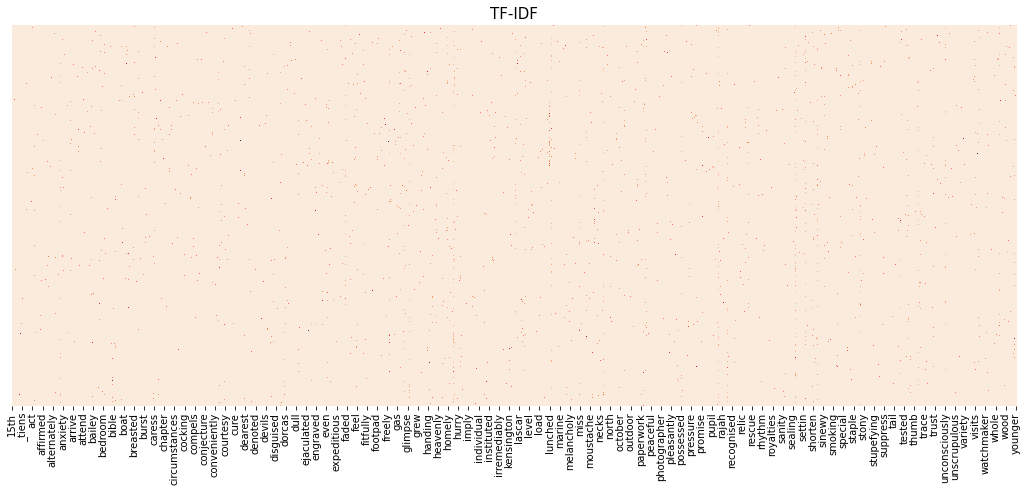

In [16]:
plt.figure(figsize=(18,7))
sns.heatmap(TFIDF_df, cbar =False,yticklabels = False, cmap = 'rocket_r').set(title='TF-IDF')

# 4. Model Building and Classification

In [17]:
# Defining Algorithms for using in all below code blocks
algorithms = {
            'SVM' : SVC(random_state = 21),
            'DTR' : DecisionTreeClassifier(random_state = 21),
            'RFC' : RandomForestClassifier(random_state = 21),
            'KNN' : KNeighborsClassifier(),
            'GNB' : GaussianNB()
        }

def modelRes(algorithms, X_train, y_train, X_test, y_test):
    testScores = {}
    testPreds = {}
    for modelName, model in algorithms.items():
        pipelineModel = Pipeline([('MODEL', model)])         
        pipelineModel.fit(X_train, y_train)
        testPreds[modelName] = pipelineModel.predict(X_test) 
        testScores[modelName] = cross_val_score(pipelineModel, X_test, y_test, cv=10, scoring="accuracy")
    avgTestScores = {}
    for name, model in testScores.items():
        avgTestScores[name] = np.mean(model)
    return avgTestScores, testPreds

## 4.1 Using Bag of Words vector Space

In [18]:
%%time
# Using the data we got from the BOW transformation (refer 3.1)
X_train, X_test, y_train, y_test = train_test_split(X_bow, df.label, test_size=0.2, random_state = 42)

# Store the cross validation scores and prediction
bowTestScores, bowTestPreds = modelRes(algorithms=algorithms,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test)


# Converting it into a dataframe
avgBowTestScores_df = pd.DataFrame(bowTestScores, index=["Accuracy"]).T
avgBowTestScores_df 

Wall time: 11 s


,Accuracy
SVM,0.585
DTR,0.725
RFC,0.710
KNN,0.395
GNB,0.660


In [19]:
for key in bowTestPreds.keys():
    print(key, classification_report(y_test, bowTestPreds[key]))

SVM               precision    recall  f1-score   support

           A       0.61      0.94      0.74        33
           B       0.97      0.75      0.85        48
           C       0.94      0.78      0.85        37
           D       0.84      0.82      0.83        38
           E       0.91      0.91      0.91        44

    accuracy                           0.83       200
   macro avg       0.85      0.84      0.83       200
weighted avg       0.87      0.83      0.84       200

DTR               precision    recall  f1-score   support

           A       0.48      0.73      0.58        33
           B       0.80      0.69      0.74        48
           C       0.83      0.68      0.75        37
           D       0.81      0.79      0.80        38
           E       0.88      0.84      0.86        44

    accuracy                           0.74       200
   macro avg       0.76      0.74      0.75       200
weighted avg       0.77      0.74      0.75       200

RFC           

## 4.2 Using IF-IDF vector Space

In [20]:
%%time
# Using the data we got from the IF-IDF transformation (refer 3.2)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df.label, test_size=0.2, random_state = 42)

# Store the cross validation scores and prediction
tfidfTestScores, tfidfTestPreds = modelRes(algorithms=algorithms,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test)

# Converting it into a dataframe
avgTfidfTestScores_df = pd.DataFrame(tfidfTestScores, index=["Accuracy"]).T
avgTfidfTestScores_df 

Wall time: 9.03 s


,Accuracy
SVM,0.485
DTR,0.675
RFC,0.695
KNN,0.705
GNB,0.615


In [21]:
for key in tfidfTestPreds.keys():
    print(key, classification_report(y_test, tfidfTestPreds[key]))

SVM               precision    recall  f1-score   support

           A       0.56      0.97      0.71        33
           B       0.97      0.73      0.83        48
           C       0.97      0.84      0.90        37
           D       0.86      0.82      0.84        38
           E       0.95      0.84      0.89        44

    accuracy                           0.83       200
   macro avg       0.86      0.84      0.83       200
weighted avg       0.88      0.83      0.84       200

DTR               precision    recall  f1-score   support

           A       0.48      0.73      0.58        33
           B       0.67      0.65      0.66        48
           C       0.71      0.68      0.69        37
           D       0.90      0.74      0.81        38
           E       0.92      0.80      0.85        44

    accuracy                           0.71       200
   macro avg       0.74      0.72      0.72       200
weighted avg       0.75      0.71      0.72       200

RFC           

## 4.3 When stop words and punctuations are not removed

In [22]:
print('############## Uncleaned Data\n'+df_unclean.text[0])
print('\n############## Cleaned Data\n'+df.text[0])

############## Uncleaned Data
rose at once Jephro said she there is an impertinent fellow upon the road there who stares up at Miss Hunter No friend of yours Miss Hunter he asked No I know no one in these parts Dear me How very impertinent Kindly turn round and motion to him to go away Surely it would be better to take no notice No no we should have him loitering here always Kindly turn round and wave him away like that I did as I was told and at the same instant Mrs Rucastle drew down the blind That was a week

############## Cleaned Data
rose jephro said impertinent fellow upon road stares miss hunter friend miss hunter asked know parts dear impertinent kindly turn round motion go away surely would better notice loitering always kindly turn round wave away like told instant mrs rucastle drew blind week


In [23]:
def modelRes20(algorithms, X_train, y_train, X_test, y_test):
    testScores = {}
    testPreds = {}
    for modelName, model in algorithms.items():
        pipelineModel = Pipeline([('MODEL', model)])         
        pipelineModel.fit(X_train, y_train)
        testPreds[modelName] = pipelineModel.predict(X_test) 
        testScores[modelName] = cross_val_score(pipelineModel, X_test, y_test, cv=10, scoring="accuracy")
    avgTestScores = {}
    for name, model in testScores.items():
        avgTestScores[name] = np.mean(model)
    return avgTestScores, testPreds

In [24]:
# Using the uncleaned data

vectorizer = CountVectorizer()
X_unclean = vectorizer.fit_transform(df.text).toarray()

X_train, X_test, y_train, y_test = train_test_split(X_unclean, df_unclean.label, test_size=0.2, random_state = 42)

uncleanScores, uncleanPreds = modelRes20(algorithms=algorithms,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test)

# Converting it into a dataframe
uncleanScores_df = pd.DataFrame(uncleanScores, index=["Accuracy"]).T
uncleanScores_df 

,Accuracy
SVM,0.585
DTR,0.725
RFC,0.710
KNN,0.395
GNB,0.660


In [25]:
for key in uncleanPreds.keys():
    print(key, classification_report(y_test, uncleanPreds[key]))

SVM               precision    recall  f1-score   support

           A       0.61      0.94      0.74        33
           B       0.97      0.75      0.85        48
           C       0.94      0.78      0.85        37
           D       0.84      0.82      0.83        38
           E       0.91      0.91      0.91        44

    accuracy                           0.83       200
   macro avg       0.85      0.84      0.83       200
weighted avg       0.87      0.83      0.84       200

DTR               precision    recall  f1-score   support

           A       0.48      0.73      0.58        33
           B       0.80      0.69      0.74        48
           C       0.83      0.68      0.75        37
           D       0.81      0.79      0.80        38
           E       0.88      0.84      0.86        44

    accuracy                           0.74       200
   macro avg       0.76      0.74      0.75       200
weighted avg       0.77      0.74      0.75       200

RFC           

## 4.4 When no of words are reduced

## Experimenting with max_features parameter of CountVectorizer

In [31]:
def modelIteration(algorithms,X_train, y_train, X_test, y_test):
    testScores = {}
    for modelName, model in algorithms.items():
        pipelineModel = Pipeline([('MODEL', model)])         
        pipelineModel.fit(X_train, y_train)
        testScores[modelName] = cross_val_score(pipelineModel, X_test, y_test, cv=10, scoring="accuracy")
    avgTestScores = []
    for name, model in testScores.items():
        avgTestScores.append(np.mean(model))
    return avgTestScores

In [32]:
%%time
scoresList = []
indexList = []
for step in range(10,8000,1000):
    vectorizer = CountVectorizer(max_features = step)
    X_iter = vectorizer.fit_transform(df.text).toarray()
    X_train, X_test, y_train, y_test = train_test_split(X_iter, df.label, test_size=0.2, random_state = 42)
    scoresList.append(modelIteration(algorithms,X_train, y_train, X_test, y_test))
    indexList.append(step)
    
iter_res_df = pd.DataFrame(scoresList, index = indexList, columns = ['SVM','DTR','RFC','KNN','GNB'])

Wall time: 33.9 s


[Text(0.5, 1.0, 'Max Features vs Performance')]

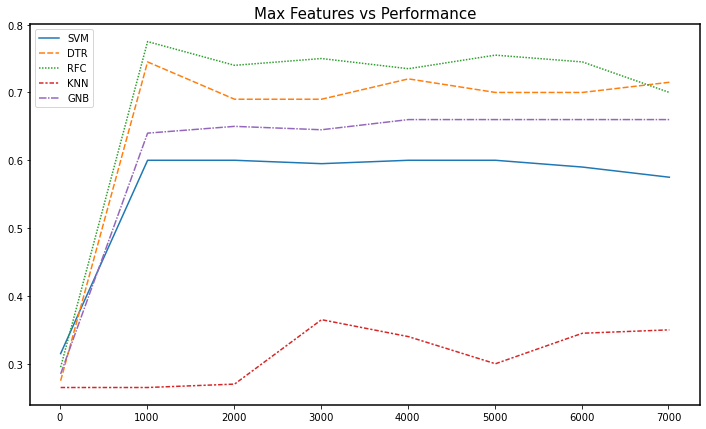

In [33]:
plt.figure(figsize=(12,7))
sns.lineplot(data = iter_res_df).set(title='Max Features vs Performance')

# 5. Evaluation, Results, The Champion model

## Accuracy Scores Comparision in different Scenarios

<AxesSubplot:title={'center':'Unclean Scenario'}>

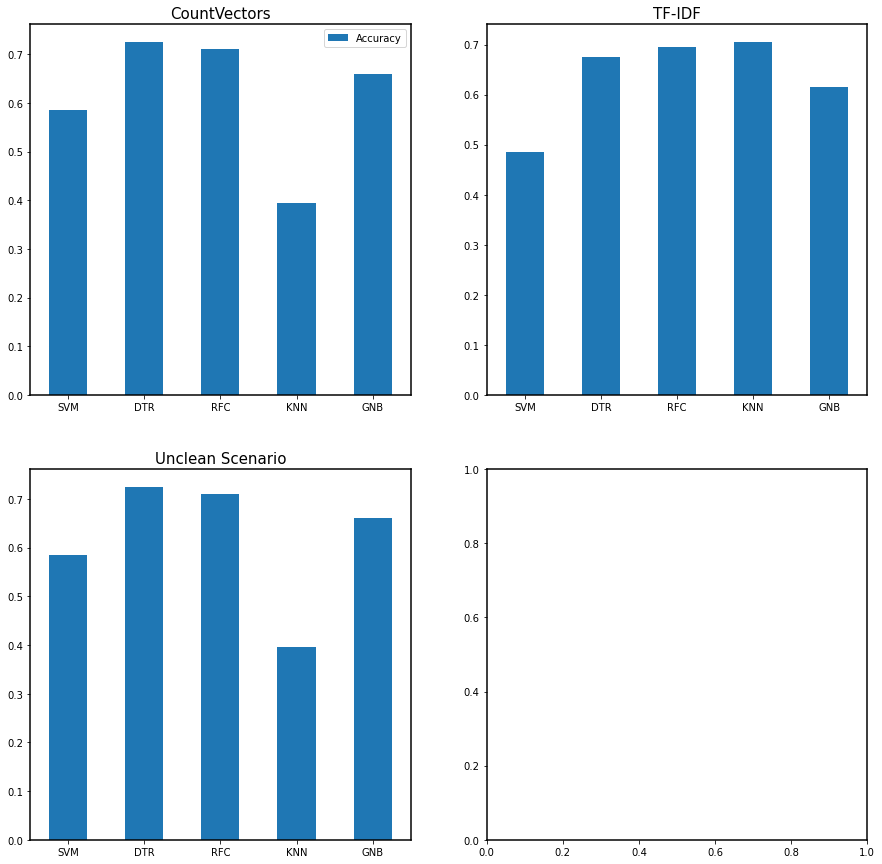

In [34]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
avgBowTestScores_df.plot(kind='bar', ax=axes[0,0], rot=0, title="CountVectors")
avgTfidfTestScores_df.plot(kind='bar', ax=axes[0,1], rot=0, legend=False, title="TF-IDF") 
uncleanScores_df.plot(kind='bar', ax=axes[1, 0], rot=0, legend=False, title="Unclean Scenario") 

# Error Analysis